In [1]:
#name: Himani Aryan
#project: XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years 
#and multiple key players in the market, it is planning for an investment in Cab industry and as per their 
#Go-to-Market(G2M) strategy they want to understand the market before taking final decision.
#XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

### importing the libraries

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### reading the datasets

In [3]:
City = pd.read_csv('/Users/himaniaryan/Desktop/City.csv')
City.head(5)
City.shape
City.describe

<bound method NDFrame.describe of                 City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 >

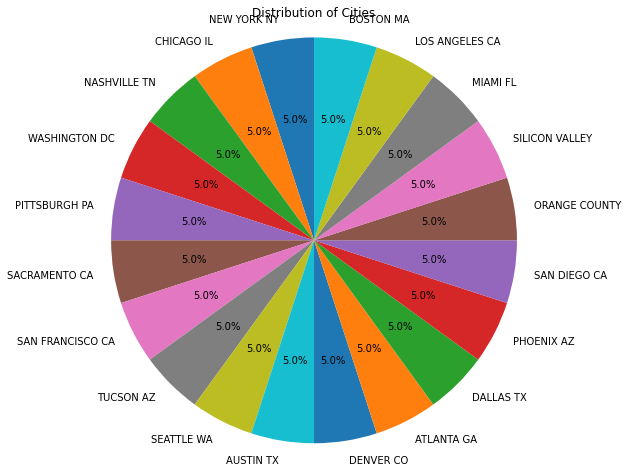

In [4]:
city_counts = City['City'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cities')
plt.axis('equal')
plt.show()

In [5]:
Cab_Data = pd.read_csv('/Users/himaniaryan/Desktop/Cab_Data.csv')
Cab_Data.head(5)
Cab_Data.shape
Cab_Data.describe

<bound method NDFrame.describe of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.

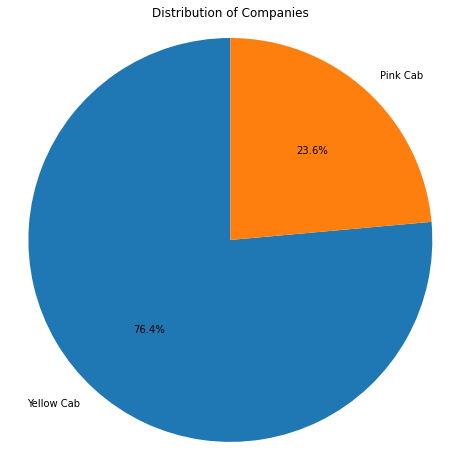

In [6]:
company_counts = Cab_Data['Company'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Companies')
plt.axis('equal')
plt.show()

In [9]:
Customer_ID = pd.read_csv('/Users/himaniaryan/Desktop/Customer_ID.csv')
Customer_ID.head(5)
Customer_ID.shape
Customer_ID.describe

<bound method NDFrame.describe of        Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]>

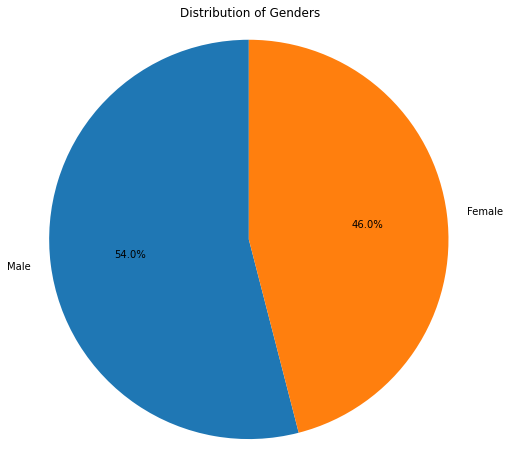

In [10]:
gender_counts = Customer_ID['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.axis('equal')
plt.show()

In [7]:
Transaction_ID = pd.read_csv('/Users/himaniaryan/Desktop/Transaction_ID.csv')
Transaction_ID.head(5)
Transaction_ID.shape
Transaction_ID.describe

<bound method NDFrame.describe of         Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]>

In [ ]:
transaction_counts = Transaction_ID['Transaction ID'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%')
plt.title('Transaction Distribution')
plt.show()

### merging of datasets

In [11]:
# Merge the DataFrames
df = Cab_Data.merge(Transaction_ID, on='Transaction ID')
df = df.merge(Customer_ID, on='Customer ID')
df = df.merge(City, on='City')

# Display the first 5 rows of the merged DataFrame
df.head(10)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


### data preprocessing

##### checking the null values

In [12]:
#missing values
df.isnull()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False,False,False,False,False,False,False,False



##### removing missing values

In [13]:

#missing values
df.dropna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


##### removing duplicates

In [14]:
#duplicates
df.drop_duplicates()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


##### rounding the columns in the dataset

In [15]:
#rounding the columns

df['KM Travelled']= round(df['KM Travelled'])
print(df)
df['Price Charged']= round(df['Price Charged'])
df['Cost of Trip']= round(df['Cost of Trip'])

        Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10351127           43302  Yellow Cab     ATLANTA GA   
2             10412921           43427  Yellow Cab     ATLANTA GA   
3             10000012           42375    Pink Cab     ATLANTA GA   
4             10320494           43211  Yellow Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10307228           43162  Yellow Cab  WASHINGTON DC   
359388        10319775           43203  Yellow Cab  WASHINGTON DC   
359389        10347676           43287  Yellow Cab  WASHINGTON DC   
359390        10358624           43314  Yellow Cab  WASHINGTON DC   
359391        10370709           43342  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0               30.0         370.95      313.6350        29290         Card   
1            

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [17]:
# printing the unique values in the 'Company' column  
print(Cab_Data['Company'].unique())

['Pink Cab' 'Yellow Cab']


Number of rides on Pink Cab: 84711
Number of rides on Yellow Cab: 274681


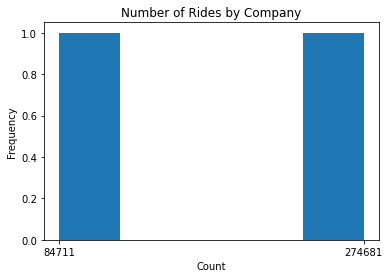

In [18]:
#counting the number of rides for each company 
#('Pink Cab' and 'Yellow Cab') in the 'Cab_Data' DataFrame 
Pink_Cab = Cab_Data[Cab_Data['Company'] == 'Pink Cab'].shape[0]
Yellow_Cab = Cab_Data[Cab_Data['Company'] == 'Yellow Cab'].shape[0]

print("Number of rides on Pink Cab:", Pink_Cab)
print("Number of rides on Yellow Cab:", Yellow_Cab)

#creating histogram for visualization

Company = ['Pink Cab', 'Yellow Cab']
Count = [Pink_Cab, Yellow_Cab]

plt.hist(Count, bins=5)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Number of Rides by Company')
plt.xticks(Count)
plt.show()


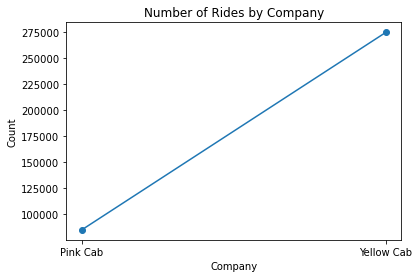

In [19]:
#visualising the result in a line plot
Company = ['Pink Cab', 'Yellow Cab']
Count = [Pink_Cab, Yellow_Cab]

plt.plot(Company, Count, marker='o')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Number of Rides by Company')
plt.show()

##### plot annotation

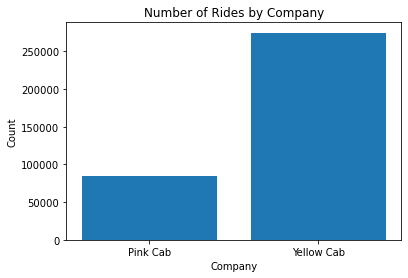

In [20]:
Company = ['Pink Cab', 'Yellow Cab']
Count = [Pink_Cab, Yellow_Cab]

plt.bar(Company, Count)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Number of Rides by Company')
plt.show()


##### outlier detection

Text(0.5, 1.0, 'KM Travelled')

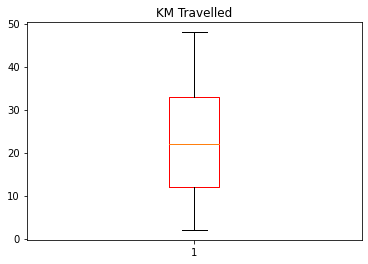

In [21]:
#detecting outliers by creating boxplots of numerical data
plt.boxplot(df['KM Travelled'], boxprops=dict(color='red'))
plt.title('KM Travelled')

#### Price charged analysis

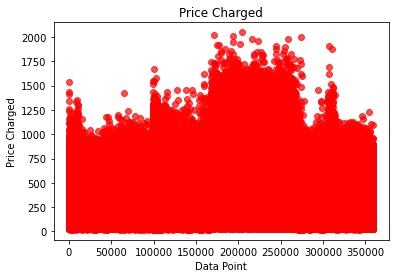

In [22]:
#creating a boxplot for the 'Price Charged' variable 
plt.scatter(np.arange(len(df['Price Charged'])), df['Price Charged'], color='red', alpha=0.7)
plt.title('Price Charged')
plt.xlabel('Data Point')
plt.ylabel('Price Charged')
plt.show()


#### Price wrt KM travelled analysis

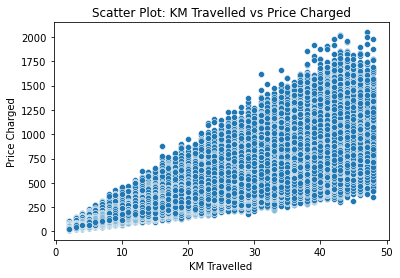

In [23]:
#creating a line plot to visualize the relationship between the 'KM Travelled' and 'Price Charged'
# A positive correlation between the two variables indicates that as the distance traveled increases, 
#the price charged also tends to increase.
sns.scatterplot(x='KM Travelled', y='Price Charged', data=df)
plt.title('Scatter Plot: KM Travelled vs Price Charged')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.show()



#### Cost of Trip analysis

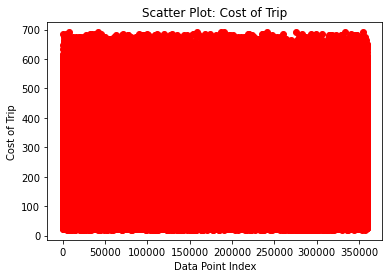

In [24]:
#creating a boxplot to visualize the distribution of the 'Cost of Trip' 
plt.scatter(x=np.arange(len(df['Cost of Trip'])), y=df['Cost of Trip'], color='red')
plt.title('Scatter Plot: Cost of Trip')
plt.xlabel('Data Point Index')
plt.ylabel('Cost of Trip')
plt.show()


#### Income analysis

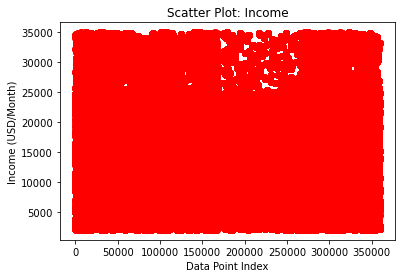

In [25]:
#creating a boxplot to visualize the distribution of the 'Income (USD/Month)
plt.scatter(x=np.arange(len(df['Income (USD/Month)'])), y=df['Income (USD/Month)'], color='red')
plt.title('Scatter Plot: Income')
plt.xlabel('Data Point Index')
plt.ylabel('Income (USD/Month)')
plt.show()



## EDA

### profit margins

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
 14  Margins             359392 non-null  float64
dtypes: float64(4), int64(5), object(6)

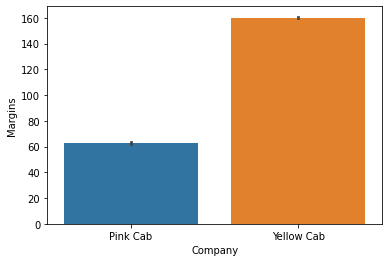

In [26]:
#calculating the profit margins for each row in the dataset by 
#subtracting the 'Cost of Trip' from the 'Price Charged'
df['Margins'] = (df['Price Charged']-df['Cost of Trip'])
df.head()
df.info()
sns.barplot(x = 'Company', y = 'Margins', data = df)
plt.show()



In [ ]:
#The bar plot shows that the Yellow Cab company has higher profit margins compared to the Pink Cab company.

(array([2.13200e+03, 2.15101e+05, 8.90990e+04, 3.22010e+04, 1.37710e+04,
        5.11800e+03, 1.52200e+03, 3.65000e+02, 6.40000e+01, 1.90000e+01]),
 array([-220. ,  -51.6,  116.8,  285.2,  453.6,  622. ,  790.4,  958.8,
        1127.2, 1295.6, 1464. ]),
 <BarContainer object of 10 artists>)

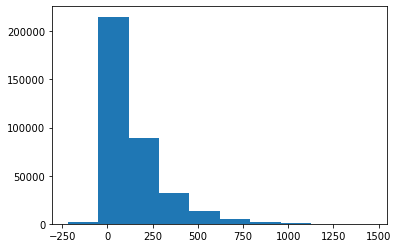

In [27]:
plt.hist(df['Margins'])

(array([9.64270e+04, 1.00935e+05, 8.68970e+04, 4.43950e+04, 1.91750e+04,
        8.09000e+03, 2.71100e+03, 6.29000e+02, 1.12000e+02, 2.10000e+01]),
 array([  16. ,  219.2,  422.4,  625.6,  828.8, 1032. , 1235.2, 1438.4,
        1641.6, 1844.8, 2048. ]),
 <BarContainer object of 10 artists>)

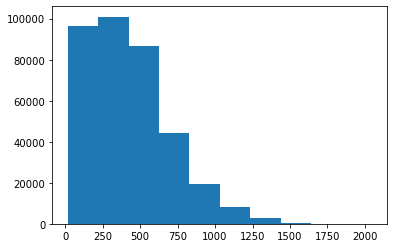

In [28]:
plt.hist(df['Price Charged'])

(array([45632., 45821., 46003., 45693., 46292., 45887., 41533., 28419.,
        11870.,  2242.]),
 array([ 19. ,  86.2, 153.4, 220.6, 287.8, 355. , 422.2, 489.4, 556.6,
        623.8, 691. ]),
 <BarContainer object of 10 artists>)

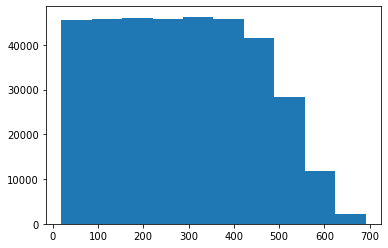

In [29]:
plt.hist(df['Cost of Trip'])

(array([ 9129.,  7867., 15979., 17699., 17111., 34708., 43071., 60195.,
        77502., 76131.]),
 array([0.69314718, 1.01095256, 1.32875795, 1.64656333, 1.96436871,
        2.2821741 , 2.59997948, 2.91778486, 3.23559024, 3.55339563,
        3.87120101]),
 <BarContainer object of 10 artists>)

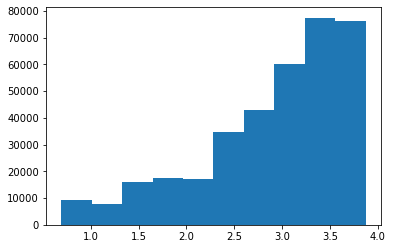

In [30]:
# From the histograms above it can be seen that data is not normal distributed. Log transformation has been applied but still it did not improve its normality. 
#To test hypothesis than non parametric methods will be used.
data_log = np.log(df['KM Travelled'])
plt.hist(data_log)


(array([  631.,  6904., 12933., 21630., 35059., 56917., 89950., 96786.,
        35685.,  2897.]),
 array([2.77258872, 3.25779175, 3.74299478, 4.2281978 , 4.71340083,
        5.19860385, 5.68380688, 6.16900991, 6.65421293, 7.13941596,
        7.62461899]),
 <BarContainer object of 10 artists>)

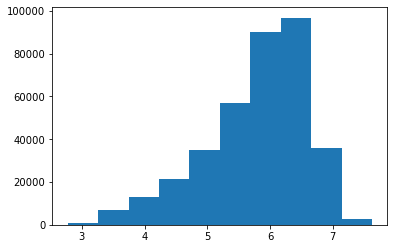

In [31]:
data_log_1 = np.log(df['Price Charged'])
plt.hist(data_log_1)

(array([ 4877.,  7045., 12215., 16587., 24043., 34218., 48758., 69206.,
        95847., 46596.]),
 array([2.94443898, 3.30380906, 3.66317915, 4.02254923, 4.38191932,
        4.7412894 , 5.10065949, 5.46002957, 5.81939965, 6.17876974,
        6.53813982]),
 <BarContainer object of 10 artists>)

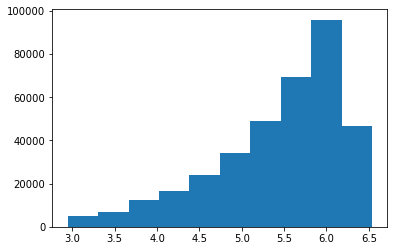

In [32]:
data_log_2 = np.log(df['Cost of Trip'])
plt.hist(data_log_2)

### customer distribution

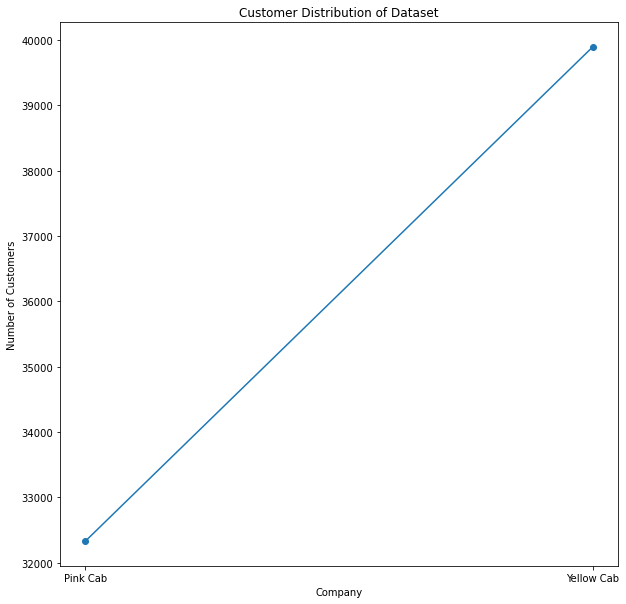

In [33]:
# Data Preparation
cust_data = df[['Customer ID', 'Company']].groupby('Company').agg({'Customer ID':'nunique'}).reset_index()

# Data Visualization
plt.figure(figsize=(10,10))
plt.plot(cust_data['Company'], cust_data['Customer ID'], marker='o', linestyle='-')
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution of Dataset')
plt.show()


In [ ]:
#Yellow cab tends to have more number of custometers than the pink cab.

### customer analysis : citywise

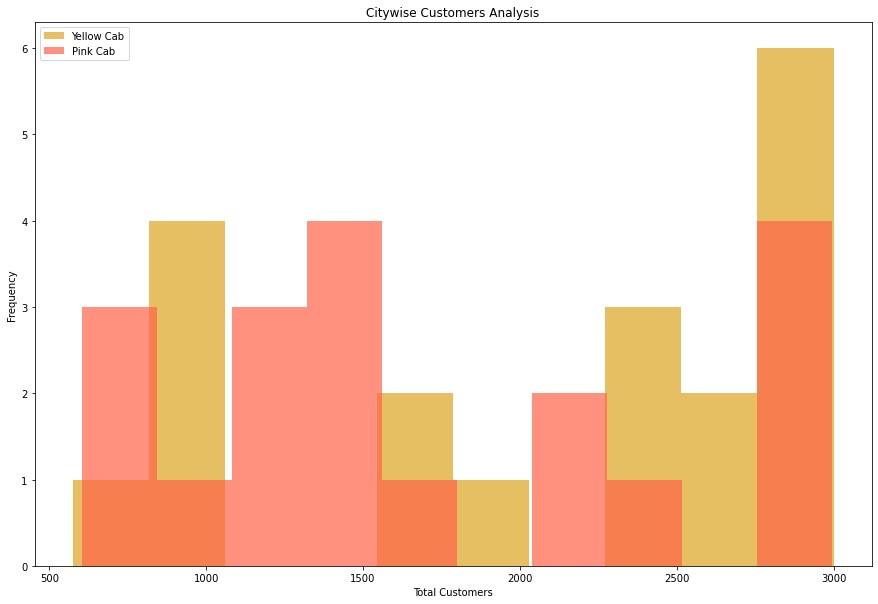

In [34]:
#creating two separate dataframes, Yellow_Cab and Pink_Cab
Yellow_Cab = df[df['Company'] == 'Yellow Cab']
Pink_Cab = df[df['Company'] == 'Pink Cab']

# Data Preparation
cust_city_yellow = Yellow_Cab.groupby('City').agg(yellow_cab_customers=('Customer ID', 'nunique')).sort_values('yellow_cab_customers', ascending=False)
cust_city_pink = Pink_Cab.groupby('City').agg(pink_cab_customers=('Customer ID', 'nunique')).sort_values('pink_cab_customers', ascending=False)

# Data Visualization
plt.figure(figsize=(15, 10))
plt.hist(cust_city_yellow['yellow_cab_customers'], bins=10, color='goldenrod', label='Yellow Cab', alpha=0.7)
plt.hist(cust_city_pink['pink_cab_customers'], bins=10, color='tomato', label='Pink Cab', alpha=0.7)
plt.xlabel('Total Customers')
plt.ylabel('Frequency')
plt.title('Citywise Customers Analysis')
plt.legend()
plt.show()

In [ ]:
# Yellow Cab shows a higher frequency of total customers compared to Pink Cab in some cities.
# However, in other cities, Pink Cab has a higher customer frequency compared to Yellow Cab.

### price charged wrt distance

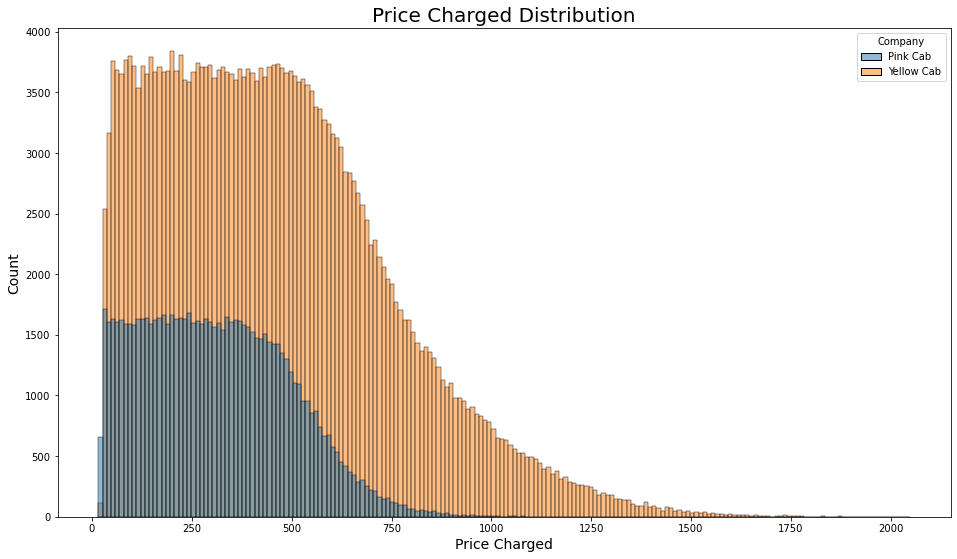

In [39]:
# Price Charged with Respect to Distance
plt.figure(figsize=(16, 9))
sns.histplot(data=Cab_Data, x='Price Charged', hue='Company')
plt.title('Price Charged Distribution', fontsize=20)
plt.xlabel('Price Charged', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


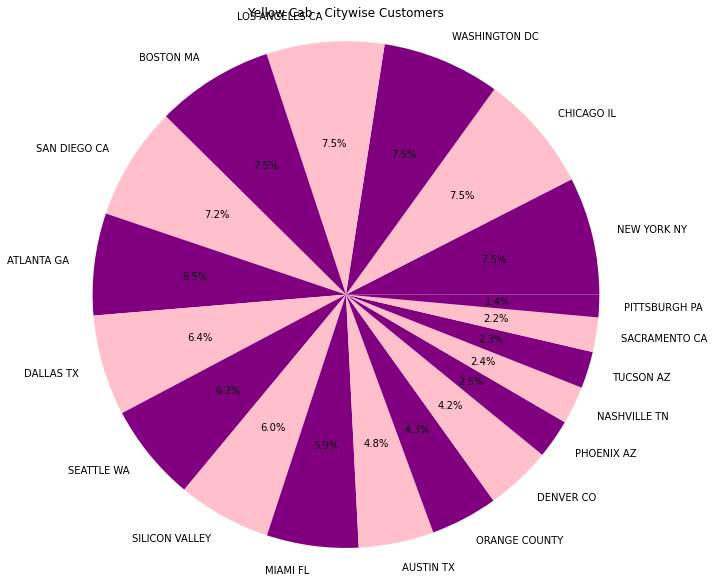

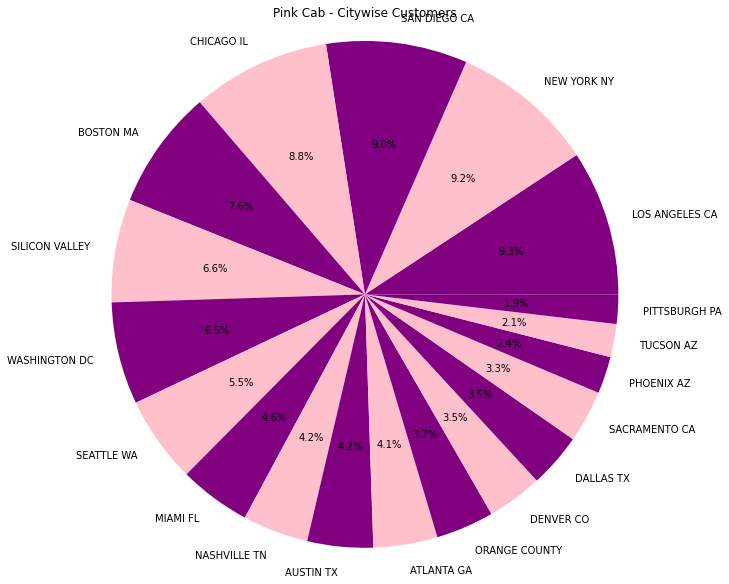

In [41]:
#also visualising in the form of piechart
plt.figure(figsize=(10, 10))
plt.pie(cust_city_yellow['yellow_cab_customers'], labels=cust_city_yellow.index, colors=['purple', 'pink'], autopct='%1.1f%%')
plt.title('Yellow Cab - Citywise Customers')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(cust_city_pink['pink_cab_customers'], labels=cust_city_pink.index, colors=['purple', 'pink'], autopct='%1.1f%%')
plt.title('Pink Cab - Citywise Customers')
plt.axis('equal')
plt.show()


### number of unique customers for each combination of company and gender

In [35]:
gender_cab = df.groupby(['Company', 'Gender'])['Customer ID'].nunique()


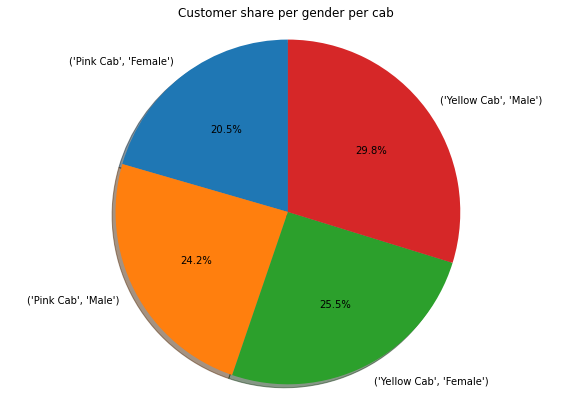

In [44]:
ind = gender_cab.index
vals = gender_cab.values
fig, ax = plt.subplots(figsize=(10,7))
ax.pie(vals , labels=ind, autopct='%1.1f%%',shadow=True, startangle=90,)
ax.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

In [ ]:
#yellow cab is mostly taken more by both males and females.

### the average price charged and cost of trip for each company 

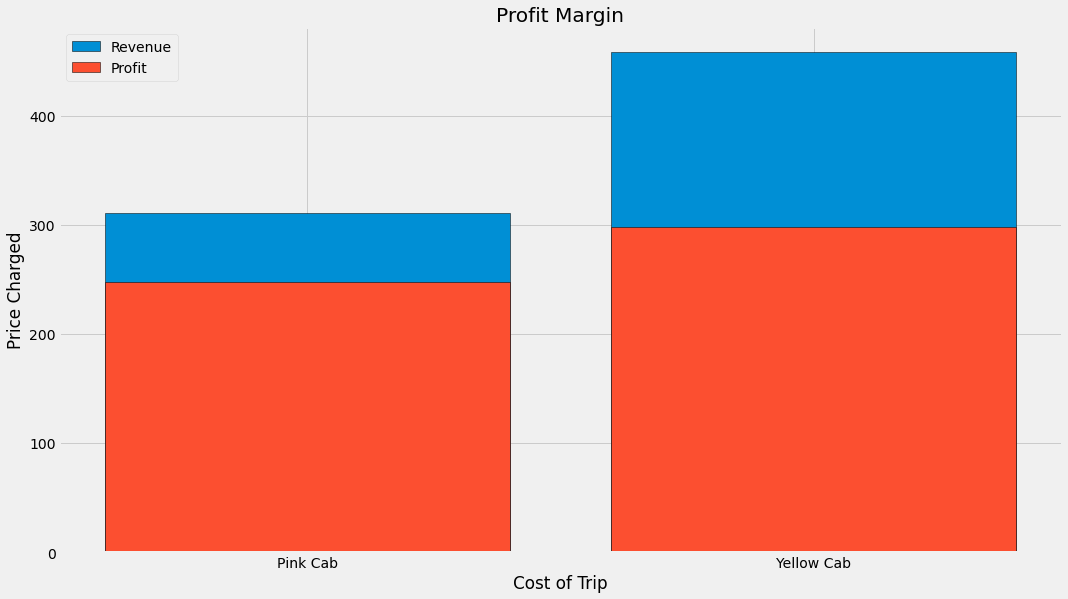

In [104]:
company = df.groupby('Company')
price_charged = company['Price Charged'].mean()  # Update column name here
cost_trip = company['Cost of Trip'].mean()  # Update column name here
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()


In [ ]:
#If the profit (cost of trip) bar is consistently higher than the revenue (price charged)
#bar for a particular company, it indicates that the profit margin is relatively lower than the other company. 
#For pink cab, this difference is significantly higher, making it a less preferable option in this case.

### KM travelled 

In [48]:
print(df.columns)


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')


In [49]:
df['KM Travelled'].describe()


count    359392.000000
mean         22.565129
std          12.239851
min           2.000000
25%          12.000000
50%          22.000000
75%          33.000000
max          48.000000
Name: KM Travelled, dtype: float64

/Users/himaniaryan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


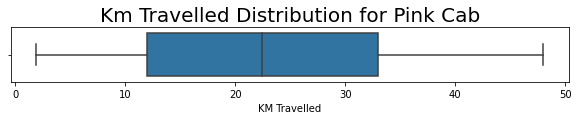

In [55]:
#Lets check the distribution of KM travlled 
plt.figure(figsize = (10, 1))
sns.boxplot(Cab_Data['KM Travelled'])
plt.title('Km Travelled Distribution for Pink Cab', fontsize=20)
plt.show()

In [ ]:
# Lets check the distribution of KM traveled
plt.figure(figsize=(10, 1))
sns.boxplot(Yellow_Cab['KM Travelled'])
plt.title('Km Travelled Distribution for Yellow Cab', fontsize=20)
plt.show()


## Hypothesis testing

In [56]:
#Hypothesis: Is there a significant difference in profit based on gender between the two cab companies?

#Null Hypothesis (H0): There is no significant difference in profit based on gender between the two cab companies.
#Alternate Hypothesis (H1): There is a significant difference in profit based on gender between the two cab companies.

In [36]:
# Calculate the Margins column
df['Margins'] = df['Price Charged'] - df['Cost of Trip']

# Yellow Cab
female_yellow = df[(df.Gender == 'Female') & (df.Company == 'Yellow Cab')].groupby('Transaction ID')['Margins'].mean()
male_yellow = df[(df.Gender == 'Male') & (df.Company == 'Yellow Cab')].groupby('Transaction ID')['Margins'].mean()
print(female_yellow.shape[0], Yellow_Cab.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(female_yellow.values, b=male_yellow.values, equal_var=True)
if p_value < 0.05:
    print('We accept the alternate hypothesis that there is a statistical difference')
else:
    print('We accept the null hypothesis that there is no statistical difference')
    
print('P value is', p_value)


116000 274681
We accept the alternate hypothesis that there is a statistical difference
P value is 6.053552471711072e-25


In [37]:
# Calculate the Margins column
df['Margins'] = df['Price Charged'] - df['Cost of Trip']

# Pink Cabs
female_pink = df[(df.Gender == 'Female') & (df.Company == 'Pink Cab')].groupby('Transaction ID')['Margins'].mean()
male_pink = df[(df.Gender == 'Male') & (df.Company == 'Pink Cab')].groupby('Transaction ID')['Margins'].mean()
print(female_pink.shape[0], male_pink.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(female_pink.values, b=male_pink.values, equal_var=True)
if p_value < 0.05:
    print('We accept the alternate hypothesis that there is a difference')
else:
    print('We accept the null hypothesis that there is no difference')
    
print('P value is', p_value)


37480 47231
We accept the null hypothesis that there is no difference
P value is 0.11412653488446957


In [ ]:
#Hypothesis: There is no seasonality in the number of customers using the cab service.

#Null Hypothesis (H0): There is no seasonality in the number of customers using the cab service.
#Alternate Hypothesis (H1): There is seasonality in the number of customers using the cab service.

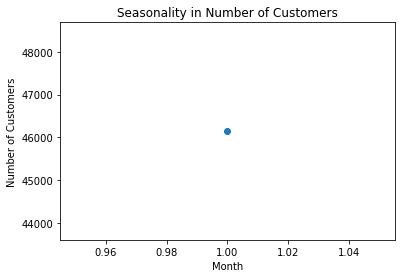

In [38]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df['Month'] = df['Date of Travel'].dt.month
monthly_customers = df.groupby('Month')['Customer ID'].nunique()

plt.plot(monthly_customers.index, monthly_customers.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Seasonality in Number of Customers')
plt.show()

In [39]:
from scipy import stats

# Perform t-test
_, p_value = stats.ttest_ind(monthly_customers.values, monthly_customers.values, equal_var=True)

# Compare p-value with significance level
if p_value < 0.05:
    print('We reject the null hypothesis that there is no seasonality')
else:
    print('We accept the null hypothesis that there is no seasonality')

print('P value is', p_value)


We accept the null hypothesis that there is no seasonality
P value is nan


/Users/himaniaryan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/himaniaryan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [69]:
#Hypothesis: There is no significant difference in the number of customers between different cab companies at different time periods.

#Null Hypothesis (H0): There is no significant difference in the number of customers between different cab companies at different time periods.
#Alternate Hypothesis (H1): There is a significant difference in the number of customers between different cab companies at different time periods.

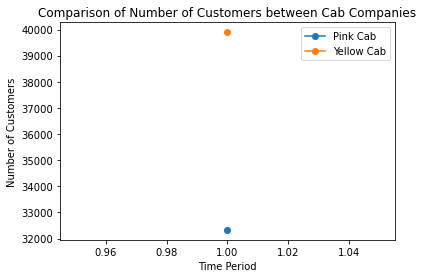

We accept the null hypothesis that there is no significant difference
P value is nan


/Users/himaniaryan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/himaniaryan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [40]:
# Convert 'Date of Travel' column to datetime format
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])

# Define time periods based on month
df['Time Period'] = df['Date of Travel'].dt.month

# Calculate the total number of customers for each company at different time periods
customer_counts = df.groupby(['Company', 'Time Period'])['Customer ID'].nunique()

# Reshape the data to have companies as columns and time periods as rows
customer_counts = customer_counts.unstack(level='Company')

# Plotting the results
customer_counts.plot(kind='line', marker='o')
plt.xlabel('Time Period')
plt.ylabel('Number of Customers')
plt.title('Comparison of Number of Customers between Cab Companies')
plt.legend()
plt.show()

# Perform statistical test to compare the number of customers between cab companies
_, p_value = stats.ttest_ind(customer_counts['Yellow Cab'], customer_counts['Pink Cab'], equal_var=True)

# Compare p-value with significance level
if p_value < 0.05:
    print('We reject the null hypothesis that there is no significant difference')
else:
    print('We accept the null hypothesis that there is no significant difference')

print('P value is', p_value)


In [72]:
#Hypothesis: There is a significant relationship between the number of customers and the profit margin in the cab service.

#Null Hypothesis (H0): There is no significant relationship between the number of customers and the profit margin in the cab service.
#Alternate Hypothesis (H1): There is a significant relationship between the number of customers and the profit margin in the cab service.

In [41]:
# Calculate profit margin for each transaction
df['Profit Margin'] = df['Price Charged'] - df['Cost of Trip']

# Calculate number of customers for each transaction
customer_counts = df.groupby('Transaction ID')['Customer ID'].nunique()

# Perform correlation analysis
correlation = customer_counts.corr(df['Profit Margin'])

# Print the correlation coefficient
print('Correlation Coefficient:', correlation)

# Perform hypothesis testing
from scipy.stats import pearsonr

# Set the significance level
alpha = 0.05

# Perform Pearson correlation test
corr_coef, p_value = pearsonr(customer_counts, df['Profit Margin'])

# Compare p-value with significance level
if p_value < alpha:
    print('We reject the null hypothesis that there is no significant relationship.')
    print('There is a significant relationship between the number of customers and profit margin.')
else:
    print('We fail to reject the null hypothesis.')
    print('There is no significant relationship between the number of customers and profit margin.')

# Print the p-value
print('p-value:', p_value)


Correlation Coefficient: nan
We fail to reject the null hypothesis.
There is no significant relationship between the number of customers and profit margin.
p-value: nan


/Users/himaniaryan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [75]:
# Hypothesis: There is no significant difference in the number of customers between different cab companies at different time periods.

# Null Hypothesis (H0): There is no significant difference in the number of customers between different cab companies at different time periods.
# Alternate Hypothesis (H1): There is a significant difference in the number of customers between different cab companies at different time periods.

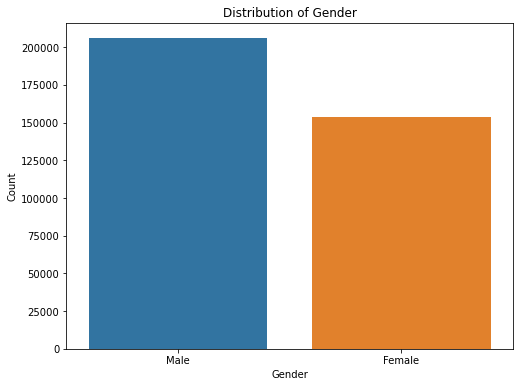

We accept the null hypothesis that there is no significant difference in the distribution of income for different segments.
P-value is 0.5179140701254699


In [42]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for analysis
customer_data = df[['Gender', 'Age', 'Income (USD/Month)']]

# Group data by gender and calculate the count
gender_counts = customer_data['Gender'].value_counts()

# Visualize the distribution of gender for different segments
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

# Perform statistical tests to investigate the significance of the differences
from scipy import stats

# Select data for different segments (e.g., based on age, income, etc.)
segment_1_data = customer_data[customer_data['Age'] < 30]
segment_2_data = customer_data[customer_data['Age'] >= 30]

# Perform a t-test to compare the distribution of income between segments
_, p_value = stats.ttest_ind(segment_1_data['Income (USD/Month)'], segment_2_data['Income (USD/Month)'], equal_var=False)
alpha = 0.05  # significance level

# Determine whether to accept or reject the null hypothesis based on the p-value
if p_value < alpha:
    print('We reject the null hypothesis that there is no significant difference in the distribution of income for different segments.')
else:
    print('We accept the null hypothesis that there is no significant difference in the distribution of income for different segments.')
print('P-value is', p_value)


## Conclusions

###### Yellow Cab company is recommended over the pink cab company as in most of the cases, yellow cab shows more advantage over pink cabs